# Model Training

### 1.1 Import required data and libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Model selction
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler


import warnings

Import CSV file as pandas dataframe

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and y variable

In [4]:
X = df.drop(columns='math_score', axis=1)

y = df['math_score']

- Here we are going to predict Math score

In [5]:
# Create column transformer
num_feature = X.select_dtypes(exclude="object").columns
cat_feature = X.select_dtypes(include="object").columns

from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_feature),
        ("StandardScalar", numeric_transformer, num_feature)
    ]
)


In [6]:
X = preprocessor.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [8]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(actual, predicted)
    return mae, rmse, r2_sc

In [9]:
models= {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbor Regerssor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "Catboosting Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "SVR" : SVR()
}

model_list = []
r2_score_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Model Training
    
    # Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_list.append(list(models.keys())[i])
    
    mae_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
    
    mae_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)
    
    r2_score_list.append(r2_test)
    
    # Evaluation
    print("**", list(models.keys())[i])
    print("Metrics for Train set")
    print("-MAE : {:.4f}".format(mae_train))
    print("-RMSE : {:.4f}".format(rmse_train))
    print("-R2 SCORE : {:.4f}".format(r2_train))
    
    print("-----------------------------------")
    print("Metrics for Test set")
    print("-MAE : {:.4f}".format(mae_test))
    print("-RMSE : {:.4f}".format(rmse_test))
    print("-R2 SCORE : {:.4f}".format(r2_test))
    print("===================================\n")
    
    
    
    
    

** Linear Regression
Metrics for Train set
-MAE : 4.2667
-RMSE : 5.3231
-R2 SCORE : 0.8743
-----------------------------------
Metrics for Test set
-MAE : 4.2148
-RMSE : 5.3940
-R2 SCORE : 0.8804

** Lasso
Metrics for Train set
-MAE : 5.2063
-RMSE : 6.5938
-R2 SCORE : 0.8071
-----------------------------------
Metrics for Test set
-MAE : 5.1579
-RMSE : 6.5197
-R2 SCORE : 0.8253

** Ridge
Metrics for Train set
-MAE : 4.2650
-RMSE : 5.3233
-R2 SCORE : 0.8743
-----------------------------------
Metrics for Test set
-MAE : 4.2111
-RMSE : 5.3904
-R2 SCORE : 0.8806

** K-Neighbor Regerssor
Metrics for Train set
-MAE : 4.5122
-RMSE : 5.7055
-R2 SCORE : 0.8556
-----------------------------------
Metrics for Test set
-MAE : 5.6590
-RMSE : 7.2634
-R2 SCORE : 0.7832

** Decision Tree
Metrics for Train set
-MAE : 0.0187
-RMSE : 0.2795
-R2 SCORE : 0.9997
-----------------------------------
Metrics for Test set
-MAE : 6.4600
-RMSE : 8.1823
-R2 SCORE : 0.7249

** Random Forest Regressor
Metrics for T

In [10]:
pd.DataFrame(list(zip(model_list, r2_score_list)), columns=["Model Name", "R2 Score"]).sort_values(by=["R2 Score"], ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.854632
8,AdaBoost Regressor,0.853444
7,Catboosting Regressor,0.851632
1,Lasso,0.825320
6,XGB Regressor,0.821589
3,K-Neighbor Regerssor,0.783193
9,SVR,0.728600
4,Decision Tree,0.724869


- From the above obsevation we are selecting Linear Regression

### Linear Regression

In [11]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


### Plot y_test vs y_pred

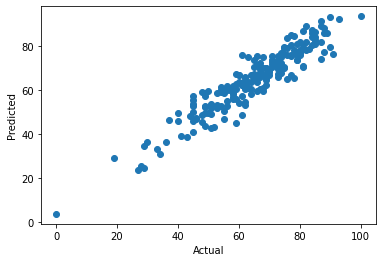

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

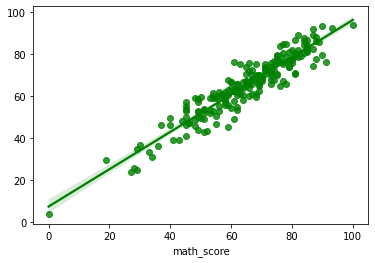

In [13]:
sns.regplot(x=y_test, y=y_pred, color="g")
plt.show()